In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df=pd.read_csv('testset.csv', index_col=0)
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,1.010000e+13,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,1.010000e+13,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,1.010000e+13,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,1.010000e+13,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,1.010000e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_=df.drop(['iduser','mdutype','group'], axis=1)

In [3]:
scaler=[preprocessing.StandardScaler() for i in df_.columns]

In [4]:
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])):
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean())- (3*df.iloc[:,i].std()))]
    return df

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25,75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5)
    upper_bound = quartile_3 + (iqr*1.5)    
    return np.where((ys > upper_bound) | (ys < lower_bound))

AttributeError: 'Figure' object has no attribute 'plot'

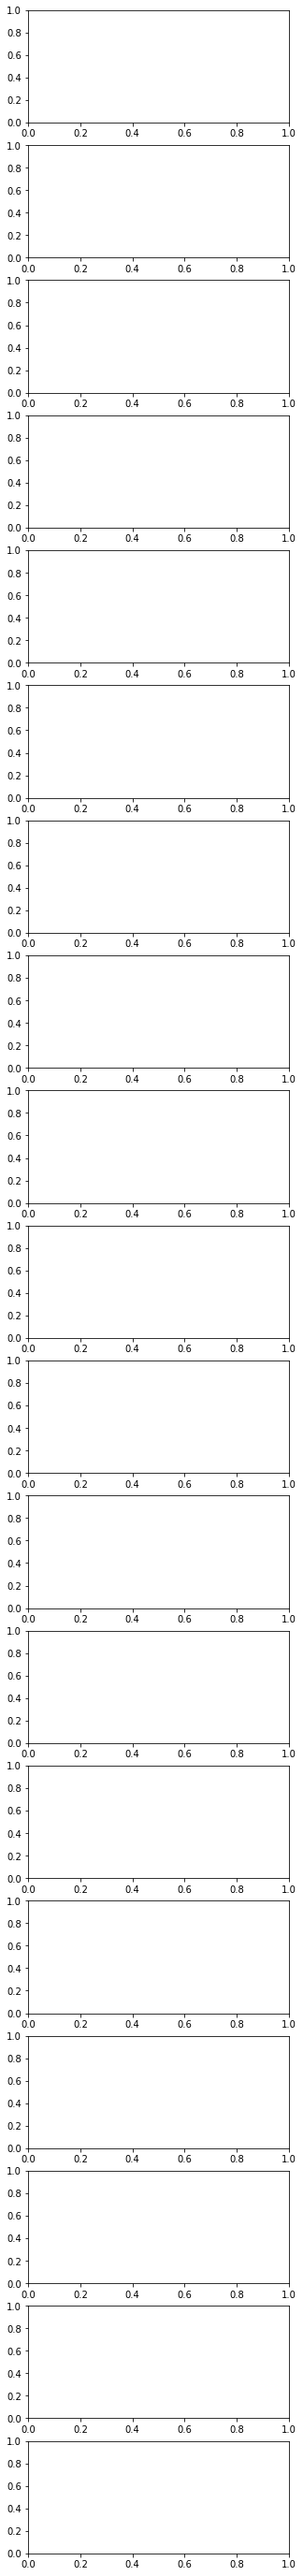

In [8]:
axes=plt.subplots(19,1,figsize=(5,50))

for i, ax in enumerate(axes):
    colname = df_.columns[i]
    col = df_[colname][df_[colname].notnull()]
    col = col.values.reshape(col.shape[0], 1)
    scaler[i].fit(col)
    sns.kdeplot(scaler[i].transform(col).reshape(-1), ax=ax, label=colname)
